# Assignment 1 & 2


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

from astsadata import *
import warnings
warnings.filterwarnings('ignore')

C:\Users\zshah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\astsadata\astsadata.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  birth = pd.read_csv(f"{path}/data/birth.csv", index_col=0, parse_dates=True)
C:\Users\zshah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\astsadata\astsadata.py:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cardox = pd.read_csv(f"{path}/data/cardox.csv", index_col=0, parse_dates=True)
C:\Users\zshah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\a

## About the two time series datasets

• The Oil DataFrame:

    contains 545 entries representing oil prices in dollars per barrel. It has a weekly index frequency ending on Sunday (W-SUN) and spans from December 27, 1999 / January 2, 2000 to June 14-20, 2010.

• The Gas DataFrame:

    also contains 545 entries, representing gas prices in cents per gallon. It shares the same characteristics as the Oil DataFrame: 545 entries in a single column, weekly frequency ending on Sunday, spanning from December 27, 1999 / January 2, 2000 to June 14-20, 2010.

In [9]:
oil.info()
oil.head()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 545 entries, 1999-12-27/2000-01-02 to 2010-06-14/2010-06-20
Freq: W-SUN
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   545 non-null    float64
dtypes: float64(1)
memory usage: 8.5 KB


,value
index,
1999-12-27/2000-01-02,26.20
2000-01-03/2000-01-09,26.07
2000-01-10/2000-01-16,26.34
2000-01-17/2000-01-23,24.95
2000-01-24/2000-01-30,26.27


In [3]:
gas.info()
gas.head()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 545 entries, 1999-12-27/2000-01-02 to 2010-06-14/2010-06-20
Freq: W-SUN
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   545 non-null    float64
dtypes: float64(1)
memory usage: 8.5 KB


,value
index,
1999-12-27/2000-01-02,70.636
2000-01-03/2000-01-09,71.040
2000-01-10/2000-01-16,68.490
2000-01-17/2000-01-23,65.137
2000-01-24/2000-01-30,67.918


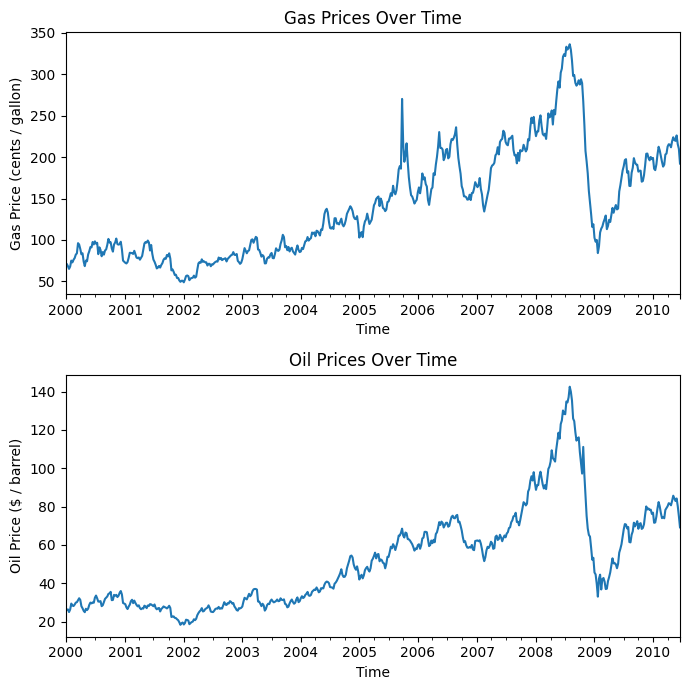

In [2]:
# Create a figure with two subplots
fig, axes = plt.subplots(nrows=2, figsize=(7, 7))  # Adjusted figsize

# Plot gas prices
gas.plot(ax=axes[0], xlabel='Time', ylabel='Gas Price (cents / gallon)', title="Gas Prices Over Time", legend=False)

# Plot oil prices in cents
oil.plot(ax=axes[1], xlabel='Time', ylabel='Oil Price ($ / barrel)', title="Oil Prices Over Time", legend=False)

# Adjust layout for clarity
fig.tight_layout()

# Display the plot
plt.show()


Question 2 - Plot both time series in one frame

In order to address the different units of the two dataframes, there are two approaches:
The first approach does not convert one unit to another. Instead, it creates two y-axes: a primary axis for oil (dollars per barrel) and a secondary axis for gas (cents per gallon).
The second approach converts gas prices from cents per gallon to dollars per barrel. This is done in two steps:
a) Converting cents to dollars (dividing by 100, as there are 100 cents in one dollar)
b) Converting gallons to barrels (multiplying by 42, as there are 42 gallons in one barrel)
After conversion, both series are plotted on the same axis.

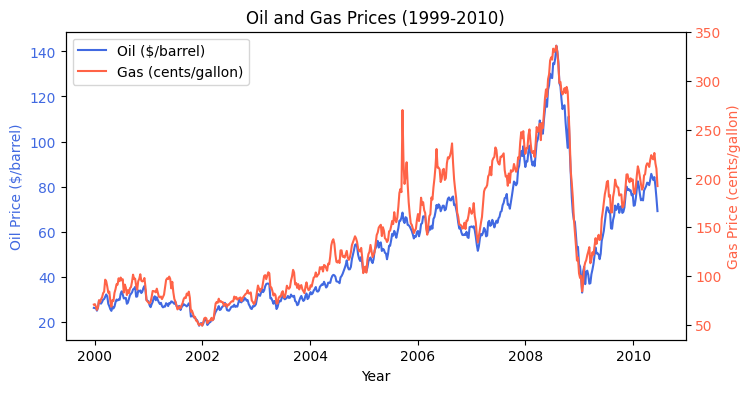

In [3]:
import matplotlib.pyplot as plt
from astsadata import gas, oil

# Convert PeriodIndex to DatetimeIndex for both datasets
oil_index = oil.index.to_timestamp()
gas_index = gas.index.to_timestamp()

# Create the plot
fig, ax1 = plt.subplots(figsize=(8, 4))

# Plot oil prices on the primary y-axis
ax1.plot(oil_index, oil['value'], color='royalblue', label='Oil ($/barrel)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Oil Price ($/barrel)', color='royalblue')
ax1.tick_params(axis='y', labelcolor='royalblue')

# Create a secondary y-axis for gas prices
ax2 = ax1.twinx()
ax2.plot(gas_index, gas['value'], color='tomato', label='Gas (cents/gallon)')
ax2.set_ylabel('Gas Price (cents/gallon)', color='tomato')
ax2.tick_params(axis='y', labelcolor='tomato')

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Set the title and show the plot
plt.title('Oil and Gas Prices (1999-2010)')
plt.show()


Here are some observations and interpretations:
Both oil and gas prices show an upward trend over time rather than fluctuating around a constant mean. This is a typical trend because of drift due to inflation and other long-term economic factors.

The oil and gas prices generally move in a similar direction, indicating a strong correlation between the two. When oil prices rise, gas prices tend to rise as well, and vice versa.
This co-movement is expected, as gas prices are influenced by crude oil prices, which are a significant input cost in gasoline production.

Both oil and gas prices exhibit periods of volatility, particularly between 2006 and 2008, perhaps because of the global financial crisis, which led to significant fluctuations in commodity prices.

------

Question 3: Plot the pairplot and explain your observations.

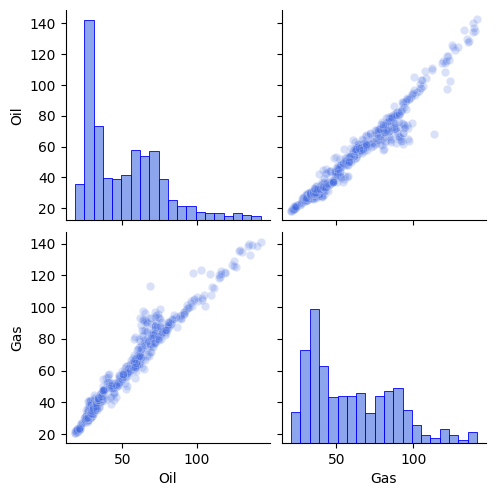

In [12]:
#First, oil and gas prices should be unified. After that, we go for plotting:
gas['value_converted'] = (gas['value'] / 100) * 42

# Plot pairwiserelationships for multiple datasets, creating scatterplots for pairs of datasets in off-diagonal 
# positions and histograms for each dataset along the diagonal

df = pd.DataFrame({'Oil': oil.value,'Gas': gas.value_converted})

# Create a pairplot
sns.pairplot(
    df, 
    plot_kws={'color': 'royalblue', 'alpha': 0.2}, 
    diag_kws={'bins': 20, 'alpha': 0.6, 'color': 'royalblue', 'edgecolor': 'blue'}
)
plt.show()

# Show plot
plt.show()

Histograms do not indicate a normal distribution (statistical evidence is tested in question 4) and are skewed to the right. It shows that lower prices for oil and gas are more common than higher prices.

The scatter plot reveals a very strong linear relationship, suggesting that oil and gas prices are highly correlated (statistical evidence will be tested in question 5). It implies that oil price changes may predict gas price changes and vice versa. As gas prices increase, oil prices increase proportionally (and vice versa).
There are a few points that deviate slightly from the main linear trend. These points could represent outliers or uncommon data points that might need to consider them.
 

Question 4: Test whether each time series data is normally distributed.

In [14]:
# We can use Shapiro-Wilk normality test:
# 1. for oil prices:
sw_stat, p_value = stats.shapiro(oil.value)

print(f'Shapiro-Wilk test statistic: {sw_stat:.3f}, p-value: {p_value:.3f}\n')

alpha = 0.05
if p_value >= alpha:
    print(f'Sample appears to be normally distributed (fail to reject "H0: Data is normal" at a {100*alpha:.0f}% significance level).')
else:
    print(f'Sample does not appear to be normally distributed (reject "H0: Data is normal" at a {100*alpha:.0f}% significance level).')


Shapiro-Wilk test statistic: 0.899, p-value: 0.000

Sample does not appear to be normally distributed (reject "H0: Data is normal" at a 5% significance level).


In [15]:
# 2. for gas prices:

sw_stat, p_value = stats.shapiro(gas.value_converted)

print(f'Shapiro-Wilk test statistic: {sw_stat:.3f}, p-value: {p_value:.3f}\n')

alpha = 0.05
if p_value >= alpha:
    print(f'Sample appears to be normally distributed (fail to reject "H0: Data is normal" at a {100*alpha:.0f}% significance level).')
else:
    print(f'Sample does not appear to be normally distributed (reject "H0: Data is normal" at a {100*alpha:.0f}% significance level).')
    

Shapiro-Wilk test statistic: 0.925, p-value: 0.000

Sample does not appear to be normally distributed (reject "H0: Data is normal" at a 5% significance level).


According to the test results, both oil and gas datasets are not normally distributed either and H0 is rejected at 5% significance level. The test statistic (0.925) of the gas dataset is closer to one compared to the oil dataset's test statistic (0.899), indicating that the distribution of the gas dataset is less deviated from normal distribution.

Question 5: Test whether the two time series data are correlated.

In [16]:
# Pearson's correlation coefficient test can be applied to answer this question: 

rho, p_value = stats.pearsonr(oil.value, gas.value_converted)

print('correlation coefficient = %.3f, p_value = %.3f\n' % (rho, p_value))

alpha = 0.05
if p_value >= alpha:
    print(f'The two samples show no correlation (fail to reject "H0: rho=0" at a {100*alpha:.0f}% significance level).')
else:
    print(f'The two samples exhibit correlation (reject "H0: rho=0" at a {100*alpha:.0f}% significance level).')
    

correlation coefficient = 0.978, p_value = 0.000

The two samples exhibit correlation (reject "H0: rho=0" at a 5% significance level).


correlation coefficient is so close to 1.00. H0 is rejected at 5% significance level implying a linear relationship and a very strong positive correlation between oil and gas prices. Test result suggests that changes in oil prices are strongly associated with changes in gas prices. It indicates that both datasets might be influenced by similar factors (e.g. global market trends, changes in demand, etc.).